# 挑战 26：各国 CO2 排放量与 GDP 总值关联分析

## 1. 数据清洁

### 读取数据

In [1]:
import pandas as pd

df_data = pd.read_excel("ClimateChange.xlsx", sheet_name='Data')

### 选择数据

In [2]:
df_co2 = df_data[df_data['Series code'] =='EN.ATM.CO2E.KT'].set_index('Country code')
df_gdp = df_data[df_data['Series code'] =='NY.GDP.MKTP.CD'].set_index('Country code')

### 缺失数据替换并填充

In [3]:
# 替换
df_co2_nan = df_co2.replace({'..': pd.np.NaN})
df_gdp_nan = df_gdp.replace({'..': pd.np.NaN})

# 填充
df_co2_fill = df_co2_nan.iloc[:, 5:].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
df_gdp_fill = df_gdp_nan.iloc[:, 5:].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)

### 数据合并

In [4]:
df_co2_fill['CO2-SUM'] = df_co2_fill.sum(axis=1)
df_gdp_fill['GDP-SUM'] = df_gdp_fill.sum(axis=1)
df_merge = pd.concat([df_co2_fill['CO2-SUM'], df_gdp_fill['GDP-SUM']], axis=1)

df_clean = df_merge.fillna(value=0)

## 2. 数据整理及绘图

### 数据归一化处理

$$X^{*}=\frac{X-X_{min}}{X_{max}-X_{min}}$$

In [5]:
df_max_min = (df_clean - df_clean.min()) / (df_clean.max() - df_clean.min())

### 获取中国归一化后的 CO2 和 GDP 数据

In [6]:
import numpy as np

china = []
for i in df_max_min[df_max_min.index == 'CHN'].values:
    china.extend(np.round(i, 3).tolist())

### 坐标刻度处理

In [7]:
# 获取 5 个常任理事国标签及对应的坐标刻度
countries_labels = ['USA', 'CHN', 'FRA', 'RUS', 'GBR']

In [8]:
# 获取国家标签作为刻度标签
sticks_labels = []

# 获取相应国家序号对应着刻度坐标
labels_position = []

for i in range(len(df_max_min)):
    if df_max_min.index[i] in countries_labels:
        sticks_labels.append(df_max_min.index[i])
        labels_position.append(i)

### 对数据进行绘图

([<matplotlib.axis.XTick at 0x11c3813c8>,
 <a list of 5 Text xticklabel objects>)

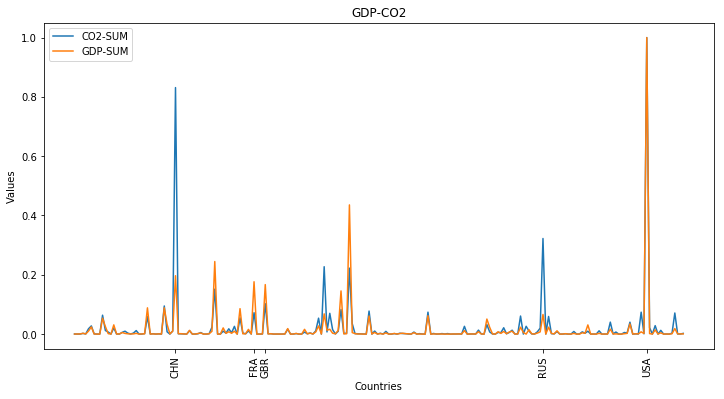

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

df_max_min.plot(kind='line', title='GDP-CO2', figsize=(12,6))

plt.xlabel("Countries")
plt.ylabel("Values")

# 绘制 5 大常任理事国坐标刻度标签
plt.xticks(labels_position, sticks_labels, rotation='vertical')